# Load MNIST

In [43]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [44]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [45]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [46]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [47]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [48]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [49]:
X.shape

(60000, 1, 28, 28)

In [50]:
X[0:25,0,:,:].shape

(25, 28, 28)

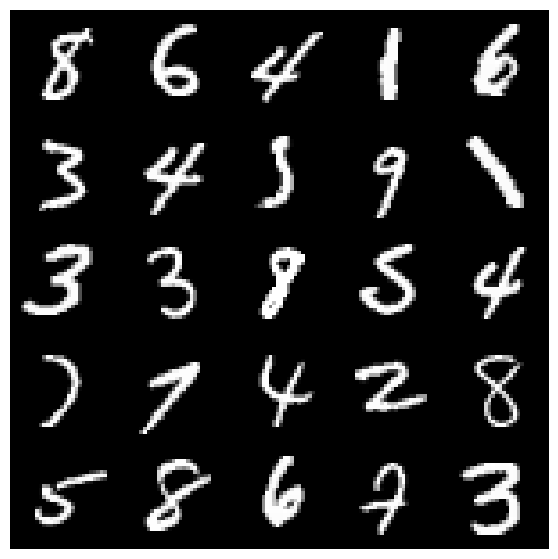

In [51]:
montage_plot(X[125:150,0,:,:])

##Run rnadom y=mx+b model on MNIST


In [52]:
X = X.reshape(X.shape[0],784) #reshape image tensor from (60000, 1, 28, 28) to
X_test = X_test.reshape(X_test.shape[0],784) # reshape image test data (60000, 1, 28, 28) to

In [53]:
X.shape

(60000, 784)

In [54]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [55]:
X.shape

torch.Size([60000, 784])

In [56]:
x = X[:,0:64]

In [57]:
X = X.T

In [58]:
X.shape

torch.Size([784, 60000])

In [59]:
M = GPU(np.random.rand(10,784))

In [60]:
batch_size = 64

x = X[:,0:batch_size]

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.1719, device='cuda:0')

##Train random walk model to at least 75% accuracy


In [61]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.08503333479166031
0.13148333132266998
0.14265000820159912
0.15039999783039093
0.17339999973773956
0.17426666617393494
0.18293333053588867
0.2081499993801117
0.21570000052452087
0.2384333312511444
0.2547999918460846
0.25683334469795227
0.2621166706085205
0.2689500153064728
0.2752666771411896
0.289000004529953
0.3013833463191986
0.30736666917800903
0.3144666850566864
0.31536665558815
0.318450003862381
0.31905001401901245
0.335016667842865
0.33603334426879883
0.33614999055862427
0.3453499972820282
0.3458000123500824
0.3477500081062317
0.3489333391189575
0.3533500134944916
0.3557833433151245
0.35813334584236145
0.36276668310165405
0.3668833374977112
0.37193334102630615
0.3726000189781189
0.3747999966144562
0.3757833242416382
0.3760000169277191
0.3770500123500824
0.3799000084400177
0.3841499984264374
0.3873666822910309
0.3887333273887634
0.3925166726112366
0.3927166759967804
0.39329999685287476
0.39430001378059387
0.3945833444595337
0.39675000309944153
0.4006666839122772
0.403800010681152